In [1]:
#importing cell

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import odeint

-----------------------------

# Physical Models of Living Systems

#### *Rafaele Gaudio 2057974*

-----------------------------

## Week 10-11: - Deadline 8 February

I propose two options (it is enough to do one of the two):

1. Choose one of the examples on feedback loop (can be either negative positive) and simulate it. Try to combine two feedback loop (or simulating the genetic network shown in class or creating one yourself), simulate it and describe in few sentences the results of the simulations (like “what’s going on” in the simulation).

2. Simulate the stochastic dynamics of the two stage model. I put notes on the Gillespie algorithm in the Google Drive

-----------------------------

### 2. Stochastic dynamics of the two stage model

In [2]:
def evolve_gillespie(m, n, nu0, nu1, d0, d1, t):
    
    # reaction A: DNA -> mRNA
    TA = nu0
    # reaction B: mRNA -> 0
    TB = d0*m
    # reaction C: mRNA -> proteins
    TC = nu1*m
    # reaction D: proteins -> 0
    TD = d1*n

    # total rate:
    T_tot = TA + TB + TC + TD
    
    dt = np.random.exponential(1./T_tot)
    t = t+dt
    
    # normalized Propensities
    propensities = np.array([TA, TB, TC, TD]) / T_tot
    
    # choose event
    event = np.random.choice(['A', 'B', 'C', 'D'], p=propensities)
        
    if event == 'A':
        m = m + 1
    elif event == 'B':
        m = m - 1
    elif event == 'C':
        n = n + 1
    elif event == 'D':
        n = n - 1
    else:
        print('error')

    return [m, n, t]


def mRNA_mf(m0, nu0, d0, t):
    m = nu0/d0 + (m0 - nu0/d0) * np.exp(-d0*t)
    return m
  
def proteins_mf(m0, n0, nu0, nu1, d0, d1, t):
    if (d1 == d0):
        F = t*np.exp(-d1*t) 
    else:
        F = (np.exp(-d0*t)-np.exp(d1*t))/(d1-d0)
    n = (nu0*nu1)/(d0*d1) + (n0 - (nu0*nu1)/(d0*d1)) * np.exp(-d1*t) + nu1 * (m0 - nu0/d0)*F  
    return n   

In [3]:
# simulation

nu0 = 1.e-2
nu1 = 1.e-2
d0 = 1.e-4
d1 = 1.e-4

m = 0
n = 0
t = 0 

TMAX = 1.e6

ts_mRNA = []
ts_proteins = []
ts_t = []

while t<TMAX:
	ts_mRNA.append(m)
	ts_proteins.append(n)
	ts_t.append(t)
	
	[m, n, t] = evolve_gillespie(m, n, nu0, nu1, d0, d1, t)
	

# mean field approximation	

m0 = 0
n0 = 0

t = np.linspace(0.001,TMAX,int(TMAX))

ts_mRNA_mean_field = mRNA_mf(m0, nu0, d0, t)
ts_proteins_mean_field = proteins_mf(m0, n0, nu0, nu1, d0, d1, t)


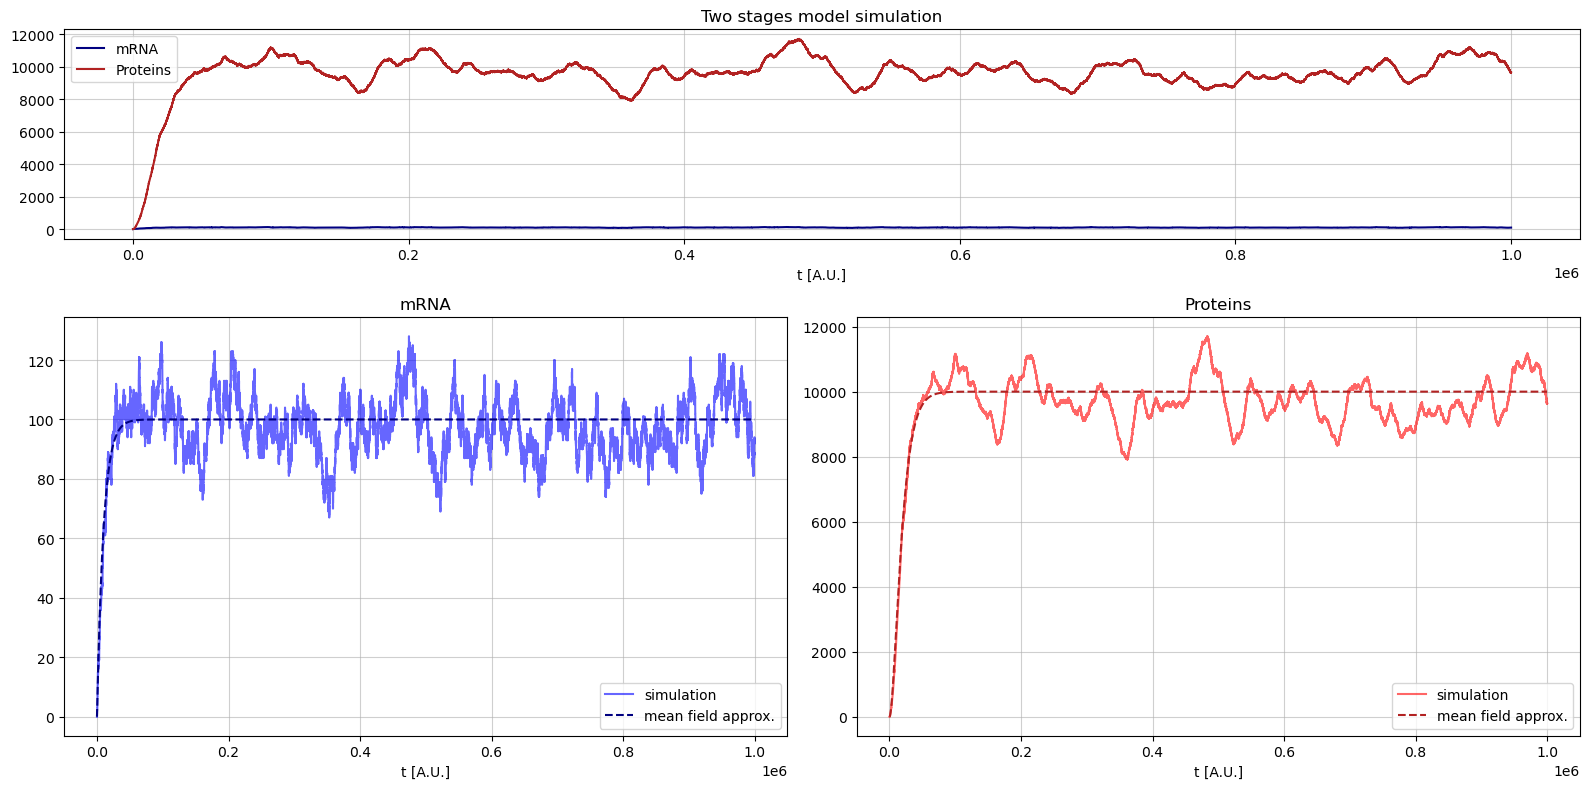

In [4]:
# plots

fig = plt.figure(tight_layout=True, figsize=(16,8))
gs = gridspec.GridSpec(2, 2, height_ratios=(1.5,3))

ax = fig.add_subplot(gs[0, :])
ax.set(xlabel="t [A.U.]", title="Two stages model simulation")
ax.plot(ts_t,ts_mRNA, label="mRNA", color="navy")
ax.plot(ts_t,ts_proteins,label="Proteins", color="firebrick")
ax.legend()
ax.grid(alpha=0.6)

ax = fig.add_subplot(gs[1, 0])
ax.set(xlabel="t [A.U.]", ylabel="",title="mRNA")
ax.plot(ts_t,ts_mRNA, label="simulation", color="blue", alpha=0.6)
ax.plot(t,ts_mRNA_mean_field, label="mean field approx.", color= "navy", ls="dashed")
ax.legend(loc=4)
ax.grid(alpha=0.6)

ax = fig.add_subplot(gs[1, 1])
ax.set(xlabel="t [A.U.]", ylabel="",title="Proteins")
ax.plot(ts_t,ts_proteins,label="simulation", color="red", alpha= 0.6)
ax.plot(t,ts_proteins_mean_field,label="mean field approx.", color= "firebrick", ls="dashed")
ax.legend(loc=4)
ax.grid(alpha=0.6)
